In [1]:
import glob
import matplotlib as mlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import re

In [2]:
#Plotting settings
font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

In [19]:
files = glob.glob( 'histos/*' )
print(files)

['histos/langle_500.dat', 'histos/ptl_300.dat', 'histos/ptl_mC324_ml295.dat', 'histos/ptl_mC324_ml290.dat', 'histos/langle_mC324_ml309.dat', 'histos/langle_mC324_ml295.dat', 'histos/dphi_100.dat', 'histos/dphi_mC324_ml290.dat', 'histos/langle.dat', 'histos/dphi_mC324_ml314.dat', 'histos/langle_mC324_ml290.dat', 'histos/MPT_mC324_ml314.dat', 'histos/ptl_500.dat', 'histos/ptl_mC324_ml314.dat', 'histos/MPT_mC324_ml309.dat', 'histos/ptl.dat', 'histos/dphi_300.dat', 'histos/MPT_mC324_ml290.dat', 'histos/langle_100.dat', 'histos/langle_300.dat', 'histos/MPT_mC324_ml295.dat', 'histos/langle_mC324_ml314.dat', 'histos/ptl_mC324_ml309.dat', 'histos/dphi_500.dat', 'histos/ptl_100.dat', 'histos/dphi_mC324_ml309.dat', 'histos/dphi_mC324_ml295.dat']


In [4]:
values=[]
variables=('ptl','langle','dphi')
for file in files:
    if 'ptl' in file: values.append(re.search("_([\S]+).dat", file).groups()[0])
        
for i in values:
    for j in variables: histos = {(i,j): []}
print(histos)
'''
for value in values:
#    print(histos[value].append(np.array([1,2,3])))
    for file in files: 
        if value in file: 
            histos[value].append(np.array(genfromtxt(file)))
            arr=np.array(genfromtxt(file))
#print(histos)
'''

NameError: name 'files' is not defined

In [5]:
histos['100']

NameError: name 'histos' is not defined

In [23]:
pTdata100 = np.array(genfromtxt('histos/pTl_100.dat'))
langledata100 = np.array(genfromtxt('histos/langle_100.dat'))
dphidata100 = np.array(genfromtxt('histos/dphi_100.dat'))

pTdata300 = np.array(genfromtxt('histos/pTl_300.dat'))
langledata300 = np.array(genfromtxt('histos/langle_300.dat'))
dphidata300 = np.array(genfromtxt('histos/dphi_300.dat'))

pTdata500 = np.array(genfromtxt('histos/pTl_500.dat'))
langledata500 = np.array(genfromtxt('histos/langle_500.dat'))
dphidata500 = np.array(genfromtxt('histos/dphi_500.dat'))


In [24]:
crossSection300=0.0119
crossSection100=0.668
crossSection500=0.00141
lumi=300

weighted100=np.full(pTdata100.size,10**3*crossSection100*lumi/pTdata100.size)
weighted300=np.full(pTdata300.size,10**3*crossSection300*lumi/pTdata300.size)
weighted500=np.full(pTdata500.size,10**3*crossSection500*lumi/pTdata500.size)

In [25]:
weighted300

array([0.0357, 0.0357, 0.0357, ..., 0.0357, 0.0357, 0.0357])

In [26]:
pTdata300.size

100000

In [27]:
1/pTdata300.size

1e-05

In [28]:
weighted500

array([0.00423, 0.00423, 0.00423, ..., 0.00423, 0.00423, 0.00423])

In [29]:
pTdata500.size

100000

In [30]:
weighted100

array([0.668, 0.668, 0.668, ..., 0.668, 0.668, 0.668])

In [31]:
pTdata100.size

300000

In [32]:
crossSection100*lumi*10**3

200400.0

Text(0,0.5,'Normalized to lumi')

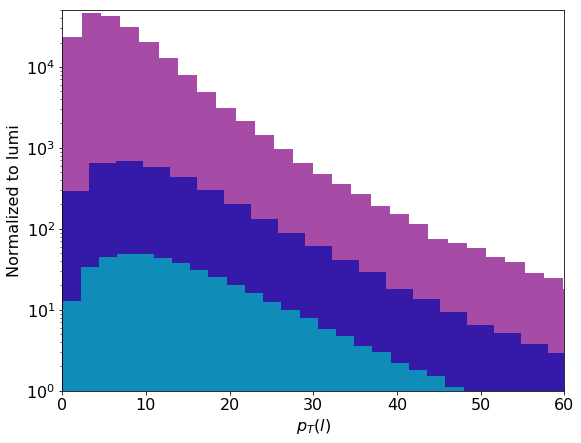

In [33]:
plt.figure(figsize=(9, 7))

n, bins, patches = plt.hist(pTdata100, bins=60, weights=weighted100 ,color='purple',
                            alpha=0.7, rwidth=1)

n, bins, patches = plt.hist(pTdata300, bins=60, weights=weighted300 ,color='#0504aa',
                            alpha=0.7, rwidth=1)
n, bins, patches = plt.hist(pTdata500, bins=60, weights=weighted500 ,color='c',
                            alpha=0.7, rwidth=1)
                            
#plt.grid(axis='y', alpha=0.75)

plt.xlim(0,60)
plt.ylim(10**(0),5*10**(4))
plt.yscale("log")

plt.xlabel('$p_T(l)$')
plt.ylabel('Normalized to lumi')
#plt.text(23, 45, '$m_l=300,\ m_C=324,\ r=5\ 10^{-8}$')

#plt.savefig('ptl_300.png')

In [34]:
0.0119*300

3.5700000000000003

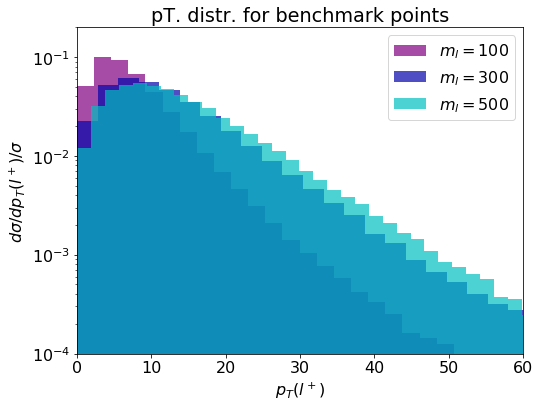

In [35]:
plt.figure(figsize=(8, 6))


n, bins, patches = plt.hist(pTdata100, bins=60, density=True,\
                            color='purple',alpha=0.7, rwidth=1, label='$m_l=100$')
n, bins, patches = plt.hist(pTdata300, bins=70,density=True,
                            color='#0504aa',alpha=0.7, rwidth=1, label='$m_l=300$')
n, bins, patches = plt.hist(pTdata500, bins=70, density=True,\
                            color='c',alpha=0.7, rwidth=1, label='$m_l=500$')
#plt.grid(axis='y', alpha=0.75)
plt.xlim(0,60)
plt.ylim(10**(-4),2*10**(-1))
plt.yscale("log")

plt.title("pT. distr. for benchmark points")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$d\\sigma/d p_T(l^+)/\\sigma$')
#plt.text(23, 45, '$m_l=300,\ m_C=324,\ r=5\ 10^{-8}$')
plt.legend(loc='upper right')


plt.savefig('ptl_bencmark.png')

In [36]:
langledata300.size

100000

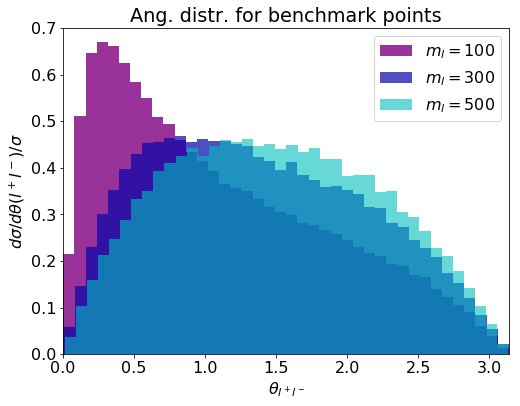

In [37]:
plt.figure(figsize=(8, 6))

n, bins, patches = plt.hist(langledata100, bins=40, density=True,\
                            color='purple', alpha=0.8, rwidth=1, label='$m_l=100$')

n, bins, patches = plt.hist(langledata300, bins=40, density=True,\
                            color='#0504aa',alpha=0.7, rwidth=1, label='$m_l=300$')

n, bins, patches = plt.hist(langledata500, bins=40, density=True,\
                            color='c',alpha=0.6, rwidth=1, label='$m_l=500$')
                        

#plt.grid(axis='y', alpha=0.75)

plt.xlim(0,np.pi)
plt.ylim(0,0.7)
#plt.yscale("log")

plt.title("Ang. distr. for benchmark points")
plt.xlabel('$\\theta_{l^+ l^-}$')
#plt.ylabel('Normalized to 1')
plt.ylabel('$d\\sigma/d\\theta(l^+ l^-)/\\sigma$')
#plt.text(23, 45, '$m_l=300,\ m_C=324,\ r=5\ 10^{-8}$')
plt.legend(loc='upper right')

plt.savefig('langle_benckmark.png')

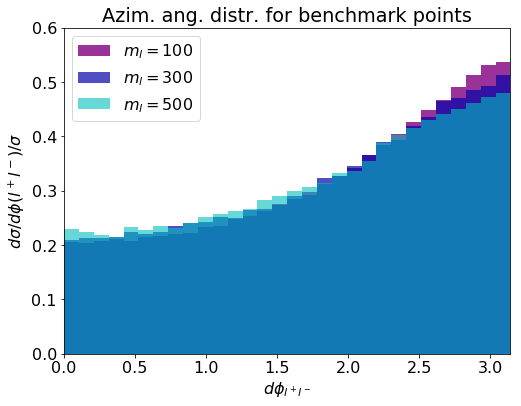

In [38]:
plt.figure(figsize=(8,6))

n, bins, patches = plt.hist(dphidata100, bins=30, density=True, color='purple',
                            alpha=0.8, rwidth=1, label='$m_l=100$')

n, bins, patches = plt.hist(dphidata300, bins=30, density=True,\
                            color='#0504aa',alpha=0.7, rwidth=1, label='$m_l=300$')

n, bins, patches = plt.hist(dphidata500, bins=30, density=True,\
                            color='c',alpha=0.6, rwidth=1, label='$m_l=500$')
                        

#plt.grid(axis='y', alpha=0.75)

plt.xlim(0,np.pi)
plt.ylim(0,0.6)
#plt.yscale("log")


plt.title("Azim. ang. distr. for benchmark points")
plt.xlabel('$d\\phi_{l^+ l^-}$')
#plt.ylabel('Normalized to 1')
plt.ylabel('$d\\sigma/d\\phi(l^+ l^-)/\\sigma$')
#plt.text(23, 45, '$m_l=300,\ m_C=324,\ r=5\ 10^{-8}$')
plt.legend(loc='upper left')

plt.savefig('dphi_benchmark.png')

In [102]:
# mC=300, ml varies
pTdata300Ml290 = np.array(genfromtxt('histos/ptl_mC324_ml290.dat'))
pTdata300Ml295 = np.array(genfromtxt('histos/ptl_mC324_ml295.dat'))
pTdata300Ml300 = np.array(genfromtxt('histos/ptl_300.dat'))
pTdata300Ml309 = np.array(genfromtxt('histos/ptl_mC324_ml309.dat'))
pTdata300Ml314 = np.array(genfromtxt('histos/ptl_mC324_ml314.dat'))

In [103]:
# pT for different splittings

plt.figure(figsize=(7, 5))

n, bins, patches = plt.hist(pTdata300Ml290, bins=30, weights=weighted*crossSection, color='purple',
                            alpha=0.8, rwidth=1, label='$\\Detla m_{Cl}=35$')
n, bins, patches = plt.hist(pTdata300Ml295, bins=30, weights=weighted*crossSection, color='purple',
                            alpha=0.8, rwidth=1, label='$\\Detla m_{Cl}=30$')
n, bins, patches = plt.hist(pTdata300Ml300, bins=30, weights=weighted*crossSection, color='purple',
                            alpha=0.8, rwidth=1, label='$\\Detla m_{Cl}=25$')
n, bins, patches = plt.hist(pTdata300Ml309, bins=30, weights=weighted*crossSection, color='purple',
                            alpha=0.8, rwidth=1, label='$\\Detla m_{Cl}=15$')
n, bins, patches = plt.hist(pTdata300Ml314, bins=30, weights=weighted*crossSection, color='purple',
                            alpha=0.8, rwidth=1, label='$\\Detla m_{Cl}=10$')

#plt.grid(axis='y', alpha=0.75)

plt.xlim(0,np.pi)
plt.ylim(0,0.7)
#plt.yscale("log")

plt.title("Ang. distr. for benchmark points")
plt.xlabel('$\\theta_{l^+ l^-}$')
#plt.ylabel('Normalized to 1')
plt.ylabel('$d\\sigma/d\\theta(l^+ l^-)/\\sigma$')
#plt.text(23, 45, '$m_l=300,\ m_C=324,\ r=5\ 10^{-8}$')
plt.legend(loc='upper right')

#plt.savefig('langle_benckmark.png')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fde2d45eea0> (for post_execute):


ValueError: 
\Detla m_{Cl}=35
^
Unknown symbol: \Detla (at char 0), (line:1, col:1)

ValueError: 
\Detla m_{Cl}=35
^
Unknown symbol: \Detla (at char 0), (line:1, col:1)

<Figure size 504x360 with 1 Axes>